In [1]:
# import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px

In [2]:
data = pd.read_csv("data/fish.csv")
data.head()

Weight  Length   Width
0      67     9.3  1.0476
1      75    10.0  1.1600
2      70    10.1  1.1484
3      72    10.1  1.1821
4      79    10.2  1.2560

In [3]:
print(data.Weight)
print(data.Length)

0      67
1      75
2      70
3      72
4      79
5      85
6      97
7      98
8      87
9     101
10     96
11    100
12     99
13     98
14    122
15    134
16    122
17    136
18    132
19    155
20    170
21    174
22    189
23    197
24    199
Name: Weight, dtype: int64
0      9.3
1     10.0
2     10.1
3     10.1
4     10.2
5     10.3
6     10.4
7     10.7
8     10.8
9     11.1
10    11.2
11    11.3
12    11.3
13    11.4
14    11.5
15    11.7
16    12.1
17    12.2
18    12.4
19    12.5
20    12.7
21    12.9
22    13.0
23    13.2
24    13.8
Name: Length, dtype: float64


In [4]:
# model 1
x = data.Length
y = data.Weight

b = 10 # Starting value of b
rate = 0.005 # Set learning rate
epsilon = 0.001 # Stop algorithm when absolute difference between 2 consecutive x-values is less than epsilon
diff = 1 # difference between 2 consecutive iterates
max_iter = 50 # set maximum number of iterations
iter = 1 # iterations counter
Err = lambda b,x,y: np.mean((y-b*x)**2)
deriv =  lambda b,x,y: np.mean(-2*x*(y-b*x)) #derivative of err func

# Now Gradient Descent

while diff > epsilon and iter < max_iter:
    b_new = b - rate * deriv(b,x, y)
    print("Iteration ", iter, ": b-value is: ", b_new,"E(b) is: ", Err(b_new, x, y) )
    diff = abs(b_new - b)
    iter = iter + 1
    b = b_new
    
print("The local minimum occurs at: ", b)



Iteration  1 : b-value is:  10.7354 E(b) is:  855.59454062608
Iteration  2 : b-value is:  10.497218648 E(b) is:  851.7588877664217
Iteration  3 : b-value is:  10.57436082428576 E(b) is:  851.356534476959
Iteration  4 : b-value is:  10.549376016230328 E(b) is:  851.3143283192425
Iteration  5 : b-value is:  10.557468095863321 E(b) is:  851.3099009669733
Iteration  6 : b-value is:  10.554847233111788 E(b) is:  851.3094365454485
Iteration  7 : b-value is:  10.555696078139754 E(b) is:  851.309387828441
The local minimum occurs at:  10.555696078139754


In [ ]:
plt.figure(figsize=(10,10))
plt.plot(x,y)

plt.grid()

In [ ]:
# model 2
x = data.Length
y = data.Weight

next_a = 1 # Initial point
next_b = 10.6 # Initial point [taken from model 1]
alpha = 0.005 # Learning rate 
epsilon = 0.00001 # Stopping criterion constant 
max_iters = 50000 # Maximum number of iterations 

# Partial derivatives and function
partialErr_a = lambda x,y,a,b: np.mean(-2*(y-a-b*x))
partialErr_b = lambda x,y,a,b:  np.mean(-2*x*(y-a-b*x))
func = lambda x,y,a,b: np.mean((y-a-b*x)**2)

next_func = func(x,y, next_a,next_b) # Initial value of function

for n in range(max_iters):
    current_a = next_a
    current_b = next_b
    current_func = next_func
    next_a = current_a-alpha*partialErr_a(x,y,current_a,current_b) # update of a
    next_b = current_b-alpha*partialErr_b(x,y,current_a,current_b) # update of b
    next_func = func(x,y,next_a,next_b)
    change_func = abs(next_func-current_func) # stopping criterion: values of function converge
    print("Iteration",n+1,": a = ",next_a,", b = ",next_b,", e(a,b) = ",next_func)
    if change_func<epsilon:
        print(change_func)
        break

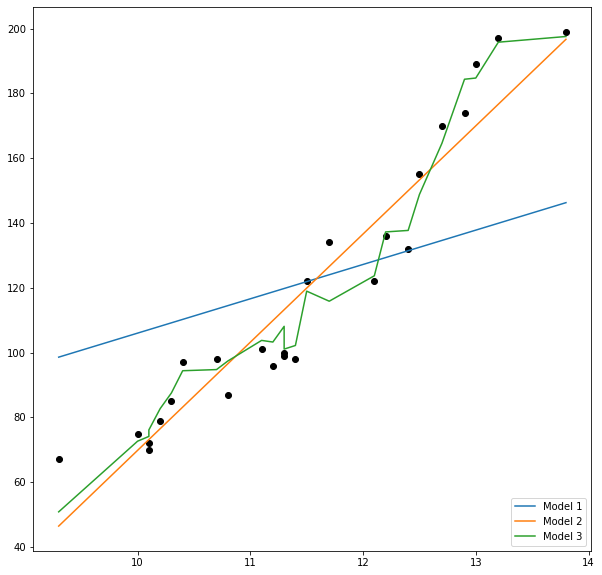

In [8]:
w= data.Width
model1 = 10.6*x
model2 = -264.2 + 33.4 * x
model3 = -212.5 + 21.6*x + 59.6*w

plt.figure(figsize=(10,10))
m, b = np.polyfit(x, y, 1)
plt.plot(x, model1, label = 'Model 1')
plt.plot(x, model2, label = 'Model 2')
plt.plot(x, model3, label = 'Model 3')
plt.scatter(x,y, color='black')
plt.legend(loc='lower right')
plt.show()

In [15]:
# model 3
x = data.Length
y = data.Weight
w= data.Width

next_a = -264.2 # Initial point [taken from model 2]
next_b = 33.4 # Initial point [taken from model 2]
next_c = 10
alpha = 0.006 # Learning rate 
epsilon = 0.00001 # Stopping criterion constant 
max_iters = 50000 # Maximum number of iterations 

# Partial derivatives and function
partialErr_a = lambda x,y,w,a,b,c: np.mean(-2*(y-a-b*x-c*w))
partialErr_b = lambda x,y,w,a,b,c: np.mean(-2*x*(y-a-b*x-c*w))
partialErr_c = lambda x,y,w,a,b,c: np.mean(-2*w*(y-a-b*x-c*w))
func = lambda x,y,w,a,b,c: np.mean((y-a-b*x-c*w)**2)

next_func = func(x,y,w, next_a,next_b, next_c) # Initial value of function

for n in range(max_iters):
    current_a = next_a
    current_b = next_b
    current_c = next_c
    current_func = next_funcs
    next_a = current_a-alpha*partialErr_a(x,y,w, current_a,current_b, current_c) # update of a
    next_b = current_b-alpha*partialErr_b(x,y,w, current_a,current_b, current_c) # update of b
    next_c = current_c-alpha*partialErr_c(x,y,w, current_a,current_b, current_c) # update of c
    next_func = func(x,y,w,next_a,next_b, next_c)
    change_func = abs(next_func-current_func) # stopping criterion: values of function converge
    print("Iteration",n+1,": a = ",next_a,", b = ",next_b, ", c = ",next_c,", e(a,b,c) = ",next_func)
    if change_func<epsilon:
        print(change_func)
        break

Iteration 1 : a =  -264.36826016 , b =  31.444215616 , c =  9.773122215136 , e(a,b,c) =  188.9478664213368
Iteration 2 : a =  -264.26200678451613 , b =  32.66304768810264 , c =  9.937675209817902 , e(a,b,c) =  141.2579424208464
Iteration 3 : a =  -264.3272348637131 , b =  31.898751278519367 , c =  9.857699031431915 , e(a,b,c) =  122.62754776509718
Iteration 4 : a =  -264.2853388490482 , b =  32.3732826785272 , c =  9.930467142539227 , e(a,b,c) =  115.3370405451827
Iteration 5 : a =  -264.31035893013893 , b =  32.0739401219244 , c =  9.907809513842853 , e(a,b,c) =  112.47170220412491
Iteration 6 : a =  -264.2935751365831 , b =  32.25802446309013 , c =  9.94475378180141 , e(a,b,c) =  111.3332088642106
Iteration 7 : a =  -264.3029030019797 , b =  32.14012105881196 , c =  9.944456799879772 , e(a,b,c) =  110.8685962224679
Iteration 8 : a =  -264.2959168390433 , b =  32.21086519251645 , c =  9.967414852578178 , e(a,b,c) =  110.66696703466718
Iteration 9 : a =  -264.299119260577 , b =  32.163